## Exploratory Data Analysis

https://archive.ics.uci.edu/dataset/360/air+quality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load data and first inspection

In [2]:
data = pd.read_csv('../data/raw/AirQuality.csv', sep=';', decimal=',')
data_orig = data.copy()
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [5]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


### Data Cleaning

In [6]:
# Rename columns to be more descriptive: distinguish between the reference values and the measured sensor values
new_column_names = {
    "CO(GT)": "CO_reference_mg_per_m3",
    "PT08.S1(CO)": "CO_sensor_counts",
    "NMHC(GT)": "NMHC_reference_microg_per_m3",
    "C6H6(GT)": "C6H6_reference_microg_per_m3",
    "PT08.S2(NMHC)": "NMHC_sensor_counts",
    "NOx(GT)": "NOx_reference_ppb",
    "PT08.S3(NOx)": "NOx_sensor_counts",
    "NO2(GT)": "NO2_reference_microg_per_m3",
    "PT08.S4(NO2)": "NO2_sensor_counts",
    "PT08.S5(O3)": "O3_sensor_counts",
    "T": "temperature_C",
    "RH": "relative_humidity_percent",
    "AH": "absolute_humidity"
}

# Rename the columns in the DataFrame
data.rename(columns=new_column_names, inplace=True)
data.head()

,Date,Time,CO_reference_mg_per_m3,CO_sensor_counts,NMHC_reference_microg_per_m3,C6H6_reference_microg_per_m3,NMHC_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [7]:
# Drop columns and rows with only missing values
data = data.dropna(axis=1, how='all') # columns
data = data.dropna(axis=0, how='all') # rows
print("Number of droppend columns: ", len(data_orig.columns) - len(data.columns))
print("Number of droppend rows: ", len(data_orig) - len(data))

Number of droppend columns:  2
Number of droppend rows:  114


### Data Transform

In [8]:
# Convert to correct data types
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y') 
data['Time'] = pd.to_datetime(data['Time'].str.replace('.', ':'), format='%H:%M:%S').dt.time
data['Timestamp'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data.set_index('Timestamp', inplace=True)
data.drop(columns=['Date', 'Time'], inplace=True)
data.head()

,CO_reference_mg_per_m3,CO_sensor_counts,NMHC_reference_microg_per_m3,C6H6_reference_microg_per_m3,NMHC_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity
Timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Data Distribution

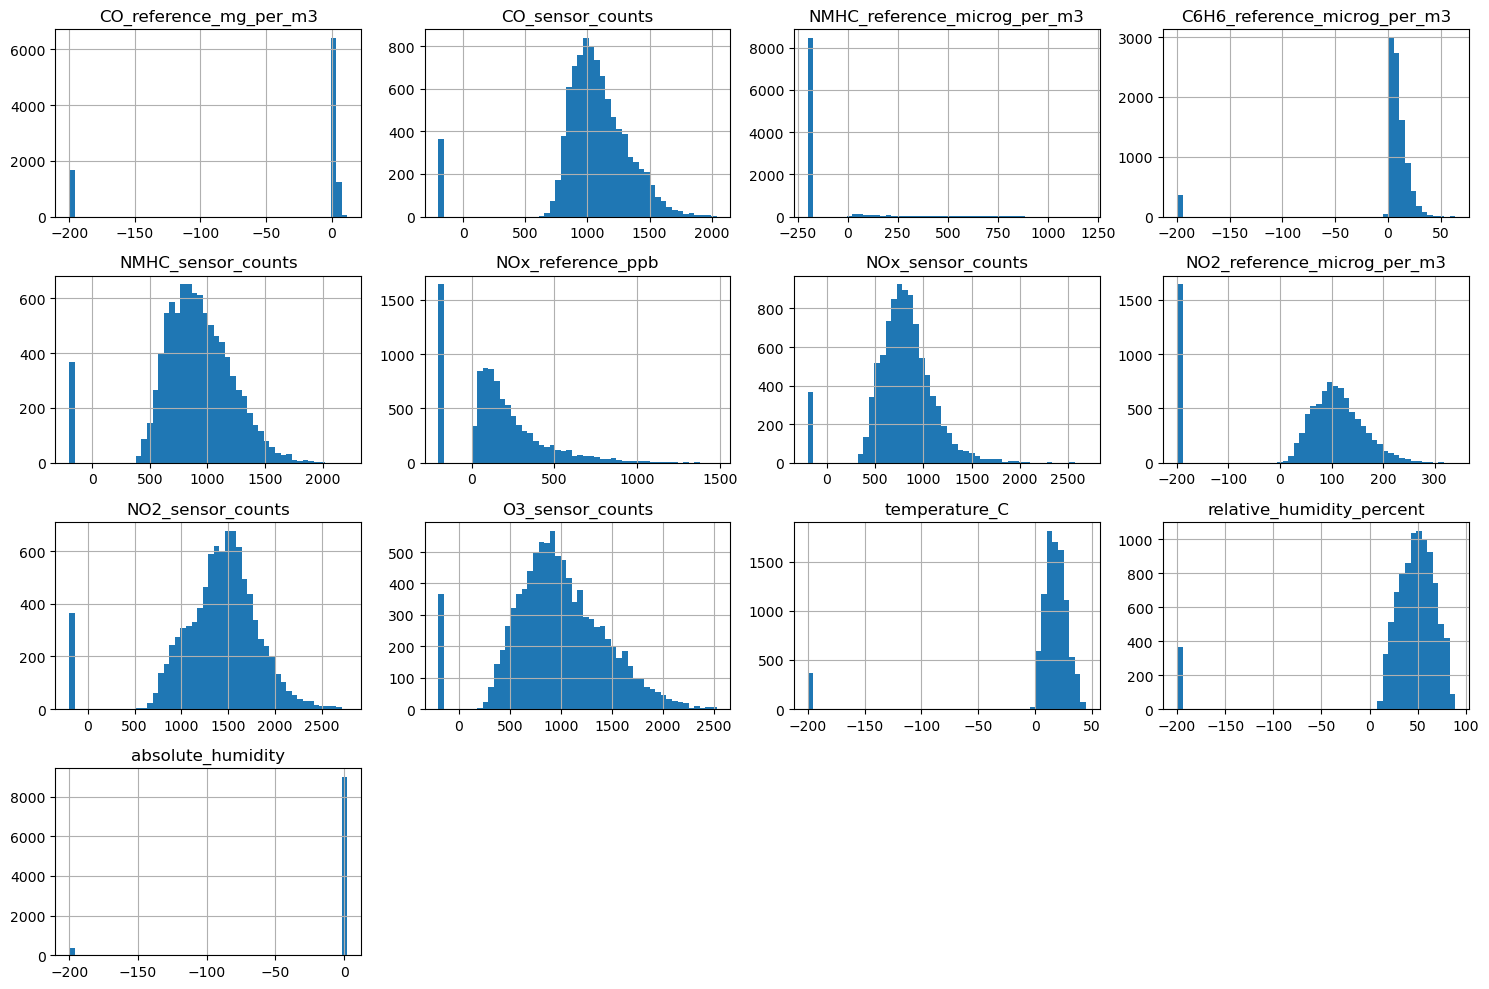

In [9]:
# Plot all values over the time (use scatter plot)
data.hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

### Data Cleaning #2

In [10]:
# Remove NMHC as most ground truth values are -200 (invalid)
print(data["NMHC_reference_microg_per_m3"].value_counts())
data_cleaned = data.drop("NMHC_reference_microg_per_m3", axis=1)
data_cleaned = data_cleaned.drop("NMHC_sensor_counts", axis=1)

# Remove C6H6 as we only have the reference values (no sensor data)
data_cleaned = data_cleaned.drop("C6H6_reference_microg_per_m3", axis=1)

# Keep O3 - potential feature?

data_cleaned.head()

NMHC_reference_microg_per_m3
-200.0    8443
 66.0       14
 40.0        9
 29.0        9
 88.0        8
          ... 
 265.0       1
 365.0       1
 642.0       1
 501.0       1
 24.0        1
Name: count, Length: 430, dtype: int64


,CO_reference_mg_per_m3,CO_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity
Timestamp,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
# -200 seems to be error or missing measurements -> replace with NaN
data_cleaned[data_cleaned == -200] = np.nan

# Replace NaN values with interpolation based on entries before and after
data_cleaned_interpolated = data_cleaned.interpolate()
data_cleaned_median = data_cleaned.fillna(data_cleaned.median())

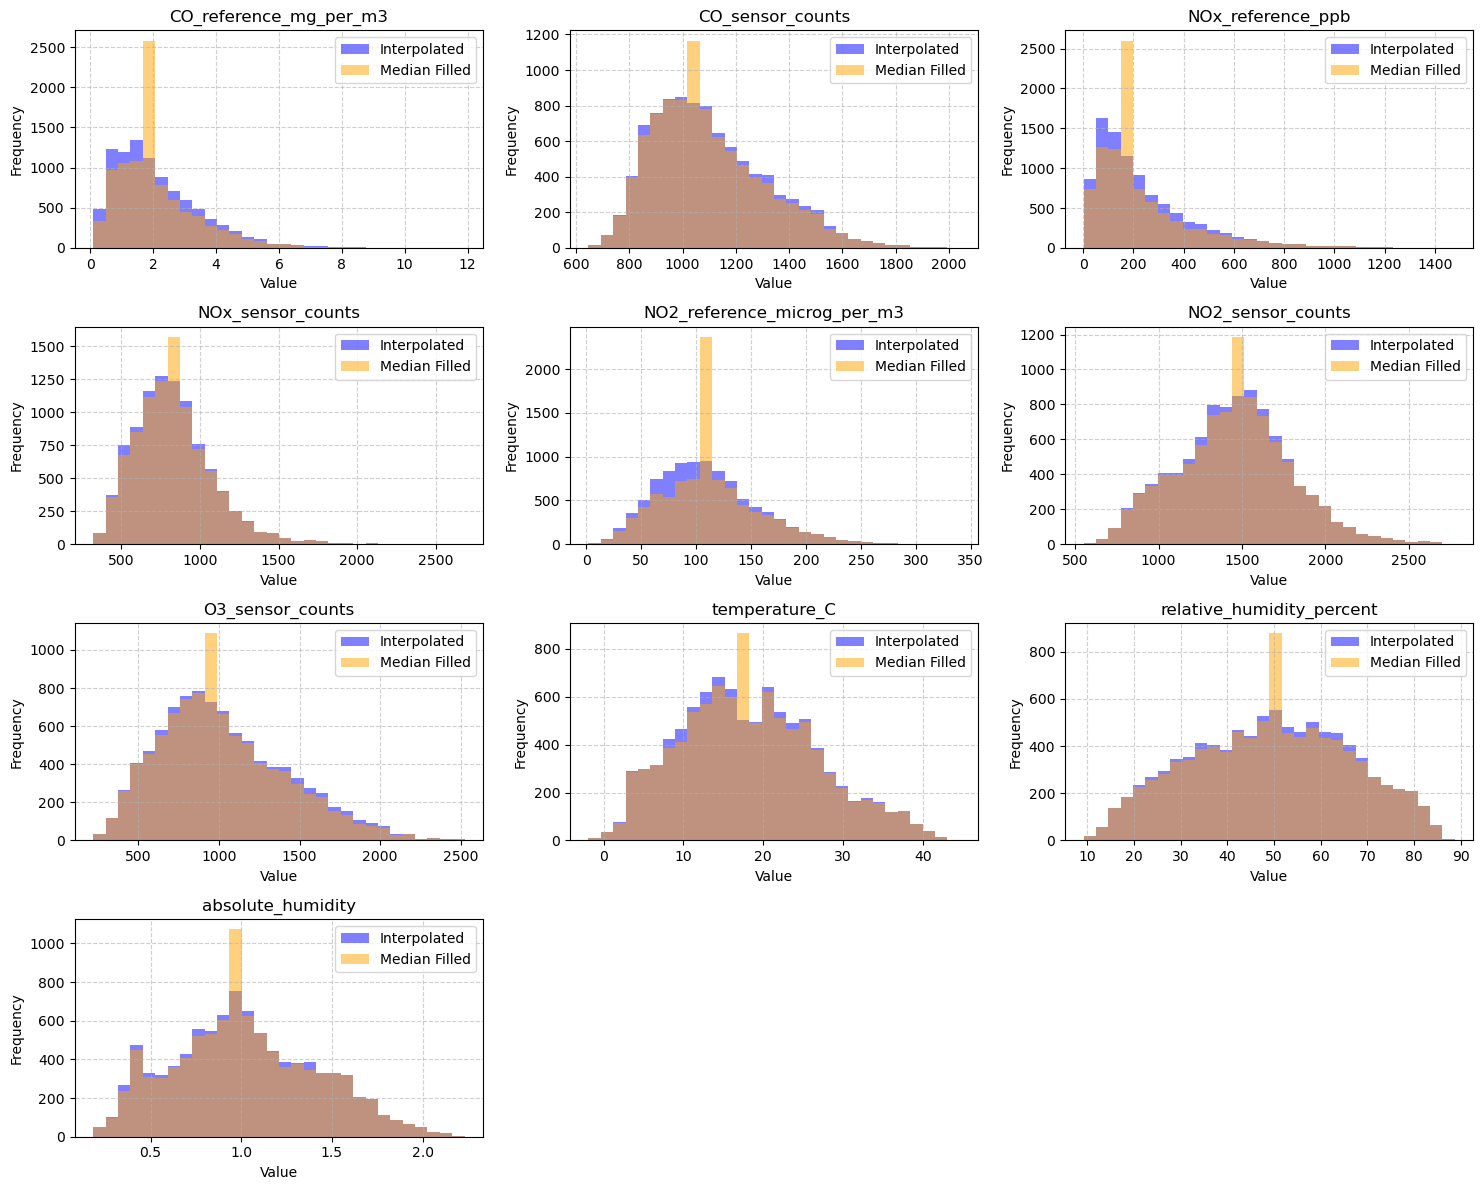

In [12]:
# Define number of columns and rows for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(data_cleaned_interpolated.columns) / num_cols))  # Calculate required rows

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust size dynamically
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each column and create histograms
for i, column in enumerate(data_cleaned_interpolated.columns):
    ax = axes[i]  # Select subplot
    
    # Plot histograms with transparency
    ax.hist(data_cleaned_interpolated[column], bins=30, alpha=0.5, label='Interpolated', color='blue')
    ax.hist(data_cleaned_median[column], bins=30, alpha=0.5, label='Median Filled', color='orange')

    # Formatting
    ax.set_title(column, fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplots if they exist

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [13]:
# Keep interpolated data
data_cleaned = data_cleaned_interpolated.copy()

### Feature Engineering

In [14]:
# Create new features
data_cleaned["Hour"] = data_cleaned.index.hour
data_cleaned["DayOfWeek"] = data_cleaned.index.dayofweek 
data_cleaned["Month"] = data_cleaned.index.month

In [15]:
data_cleaned

,CO_reference_mg_per_m3,CO_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity,Hour,DayOfWeek,Month
Timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2,3
2004-03-10 19:00:00,2.0,1292.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,2,3
2004-03-10 20:00:00,2.2,1402.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2,3
2004-03-10 21:00:00,2.2,1376.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2,3
2004-03-10 22:00:00,1.6,1272.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,0,4
2005-04-04 11:00:00,2.4,1163.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,0,4
2005-04-04 12:00:00,2.4,1142.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,0,4


### Plot New Features

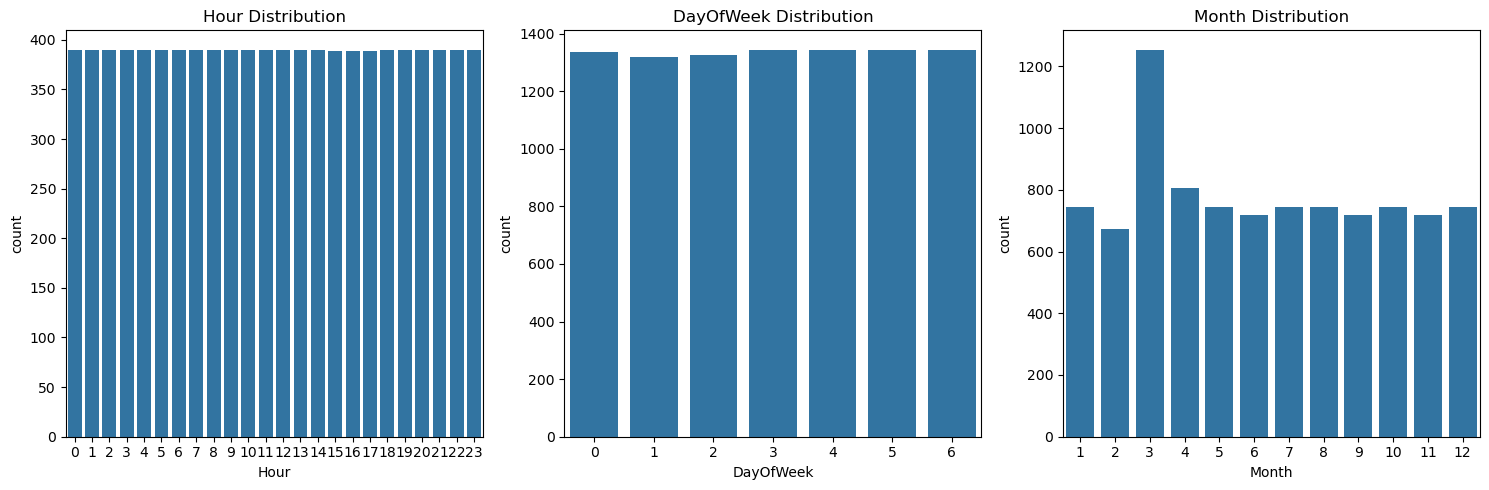

In [16]:
# Plot bar plots for categorical features
categorical_cols = ['Hour', 'DayOfWeek', 'Month']

plt.figure(figsize=(15, 5))

# Hour distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Hour', data=data_cleaned)
plt.title('Hour Distribution')

# DayOfWeek distribution
plt.subplot(1, 3, 2)
sns.countplot(x='DayOfWeek', data=data_cleaned)
plt.title('DayOfWeek Distribution')

# Month distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Month', data=data_cleaned)
plt.title('Month Distribution')

plt.tight_layout()
plt.show()

In [17]:
data_cleaned.columns

Index(['CO_reference_mg_per_m3', 'CO_sensor_counts', 'NOx_reference_ppb',
       'NOx_sensor_counts', 'NO2_reference_microg_per_m3', 'NO2_sensor_counts',
       'O3_sensor_counts', 'temperature_C', 'relative_humidity_percent',
       'absolute_humidity', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

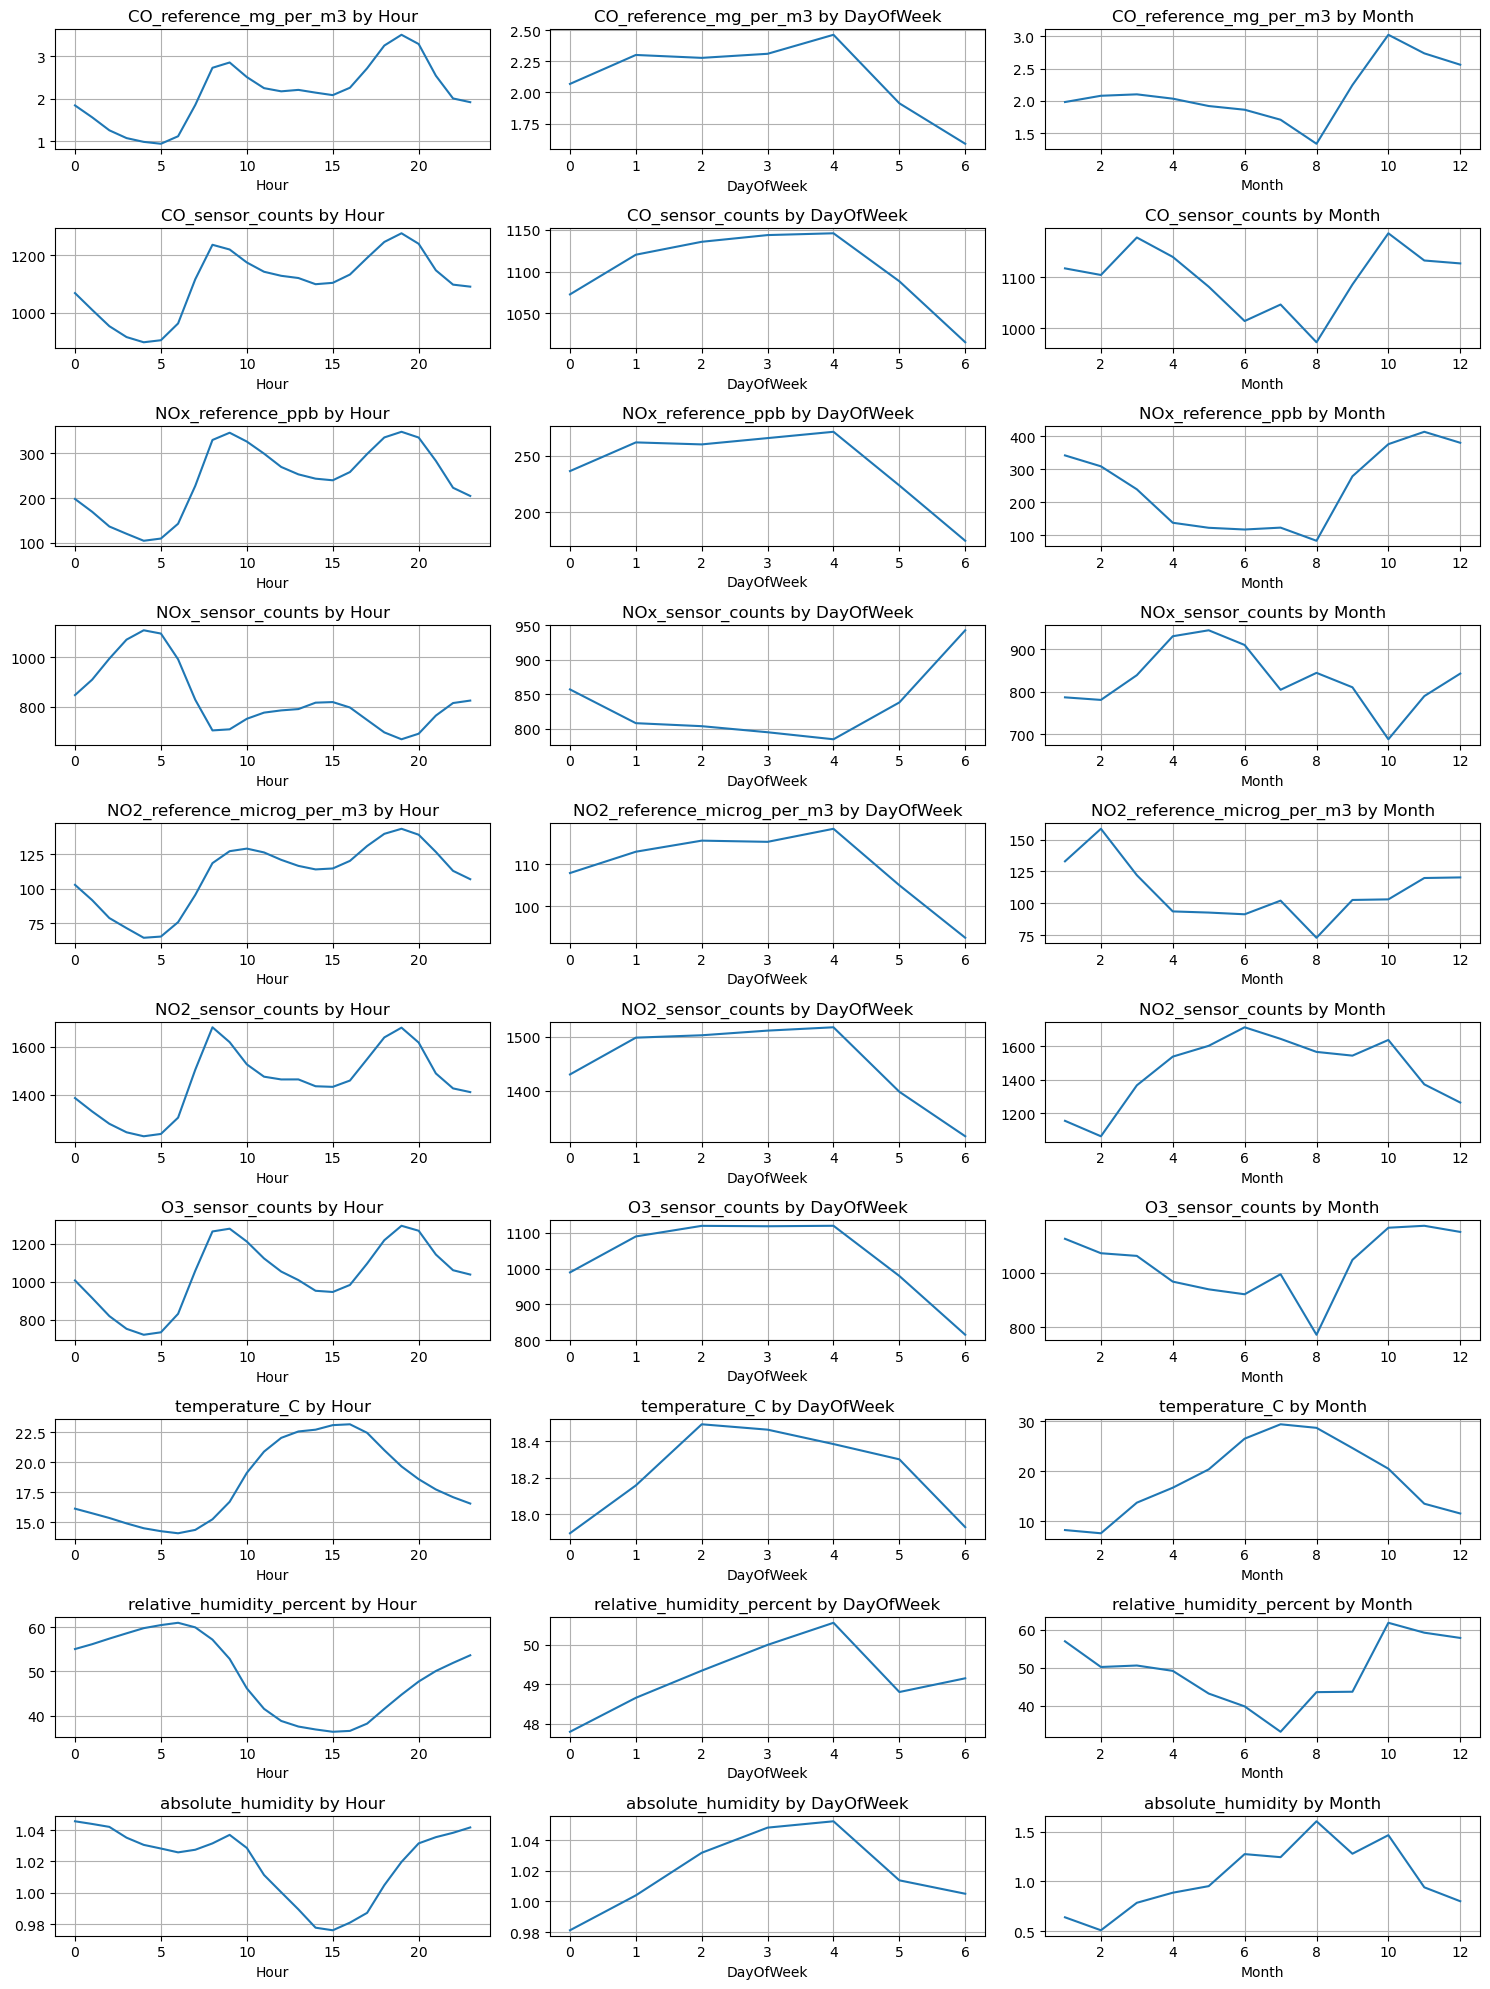

In [18]:
# Example plots for new features (all numerical features over time)
numerical_cols = ['CO_reference_mg_per_m3', 'CO_sensor_counts', 'NOx_reference_ppb',
       'NOx_sensor_counts', 'NO2_reference_microg_per_m3', 'NO2_sensor_counts',
       'O3_sensor_counts', 'temperature_C', 'relative_humidity_percent',
       'absolute_humidity']

plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, i*3 + 1)
    data_cleaned.groupby('Hour')[col].mean().plot()
    plt.title(f'{col} by Hour')
    plt.grid()

    plt.subplot(len(numerical_cols), 3, i*3 + 2)
    data_cleaned.groupby('DayOfWeek')[col].mean().plot()
    plt.title(f'{col} by DayOfWeek')
    plt.grid()

    plt.subplot(len(numerical_cols), 3, i*3 + 3)
    data_cleaned.groupby('Month')[col].mean().plot()
    plt.title(f'{col} by Month')
    plt.grid()

plt.tight_layout()
plt.show()

# Is NOx sensor reading inverted? Hour, week and month seem to be horizontally mirrored


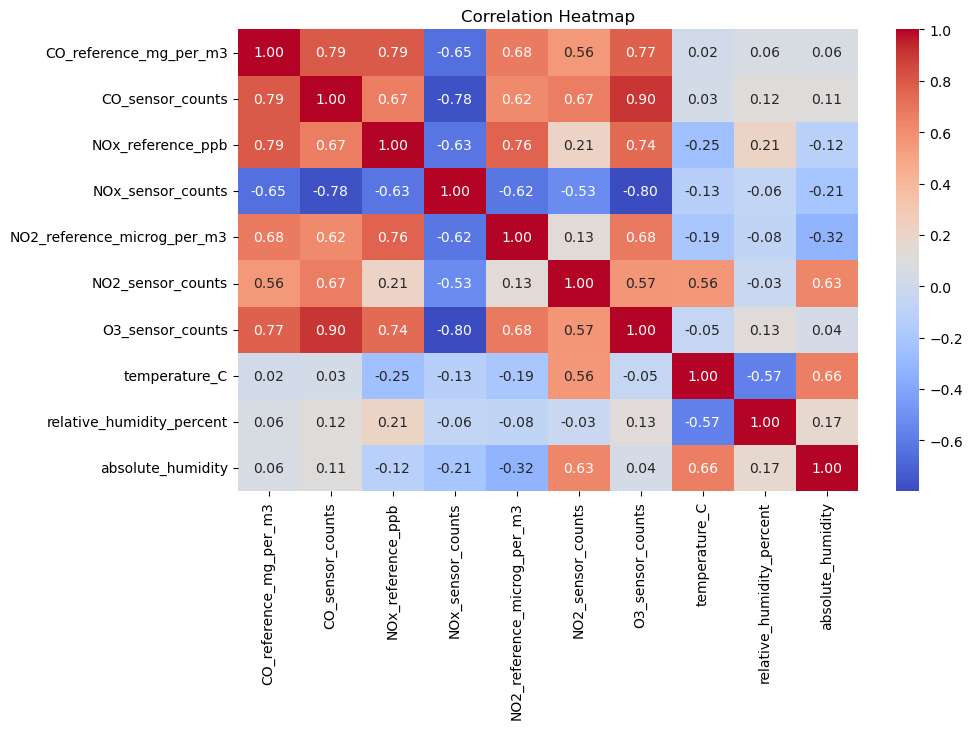

In [19]:
correlation_matrix = data_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Save cleaned data

In [20]:
data_cleaned.to_csv("../data/processed/AirQuality_cleaned.csv")

### Standardizing

In [21]:
data_cleaned_norm = data_cleaned.copy()

In [22]:
scaler = StandardScaler()
data_cleaned_norm[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
data_cleaned_norm.head()

,CO_reference_mg_per_m3,CO_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity,Hour,DayOfWeek,Month
Timestamp,,,,,,,,,,,,,
2004-03-10 18:00:00,0.327869,1.177627,-0.371614,0.873072,0.072491,0.695541,0.582197,-0.527644,-0.016947,-0.651002,18,2,3
2004-03-10 19:00:00,-0.091225,0.865965,-0.679977,1.334557,-0.379513,0.307998,-0.149704,-0.561807,-0.086741,-0.731314,19,2,3
2004-03-10 20:00:00,0.048473,1.370125,-0.542927,1.201587,0.094015,0.296343,0.102505,-0.721236,0.279675,-0.669899,20,2,3
2004-03-10 21:00:00,0.048473,1.250960,-0.342246,1.013864,0.266206,0.380845,0.421476,-0.823727,0.628642,-0.579144,21,2,3
2004-03-10 22:00:00,-0.370621,0.774299,-0.542927,1.455795,0.137063,0.106942,0.191520,-0.800951,0.605378,-0.573922,22,2,3


In [23]:
# Non-Numerical Features
data_cleaned_norm = pd.get_dummies(data_cleaned_norm, columns=['Hour', 'DayOfWeek', 'Month'])
data_cleaned_norm.head()

,CO_reference_mg_per_m3,CO_sensor_counts,NOx_reference_ppb,NOx_sensor_counts,NO2_reference_microg_per_m3,NO2_sensor_counts,O3_sensor_counts,temperature_C,relative_humidity_percent,absolute_humidity,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Timestamp,,,,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,0.327869,1.177627,-0.371614,0.873072,0.072491,0.695541,0.582197,-0.527644,-0.016947,-0.651002,...,True,False,False,False,False,False,False,False,False,False
2004-03-10 19:00:00,-0.091225,0.865965,-0.679977,1.334557,-0.379513,0.307998,-0.149704,-0.561807,-0.086741,-0.731314,...,True,False,False,False,False,False,False,False,False,False
2004-03-10 20:00:00,0.048473,1.370125,-0.542927,1.201587,0.094015,0.296343,0.102505,-0.721236,0.279675,-0.669899,...,True,False,False,False,False,False,False,False,False,False
2004-03-10 21:00:00,0.048473,1.250960,-0.342246,1.013864,0.266206,0.380845,0.421476,-0.823727,0.628642,-0.579144,...,True,False,False,False,False,False,False,False,False,False
2004-03-10 22:00:00,-0.370621,0.774299,-0.542927,1.455795,0.137063,0.106942,0.191520,-0.800951,0.605378,-0.573922,...,True,False,False,False,False,False,False,False,False,False


### Plot and save new data

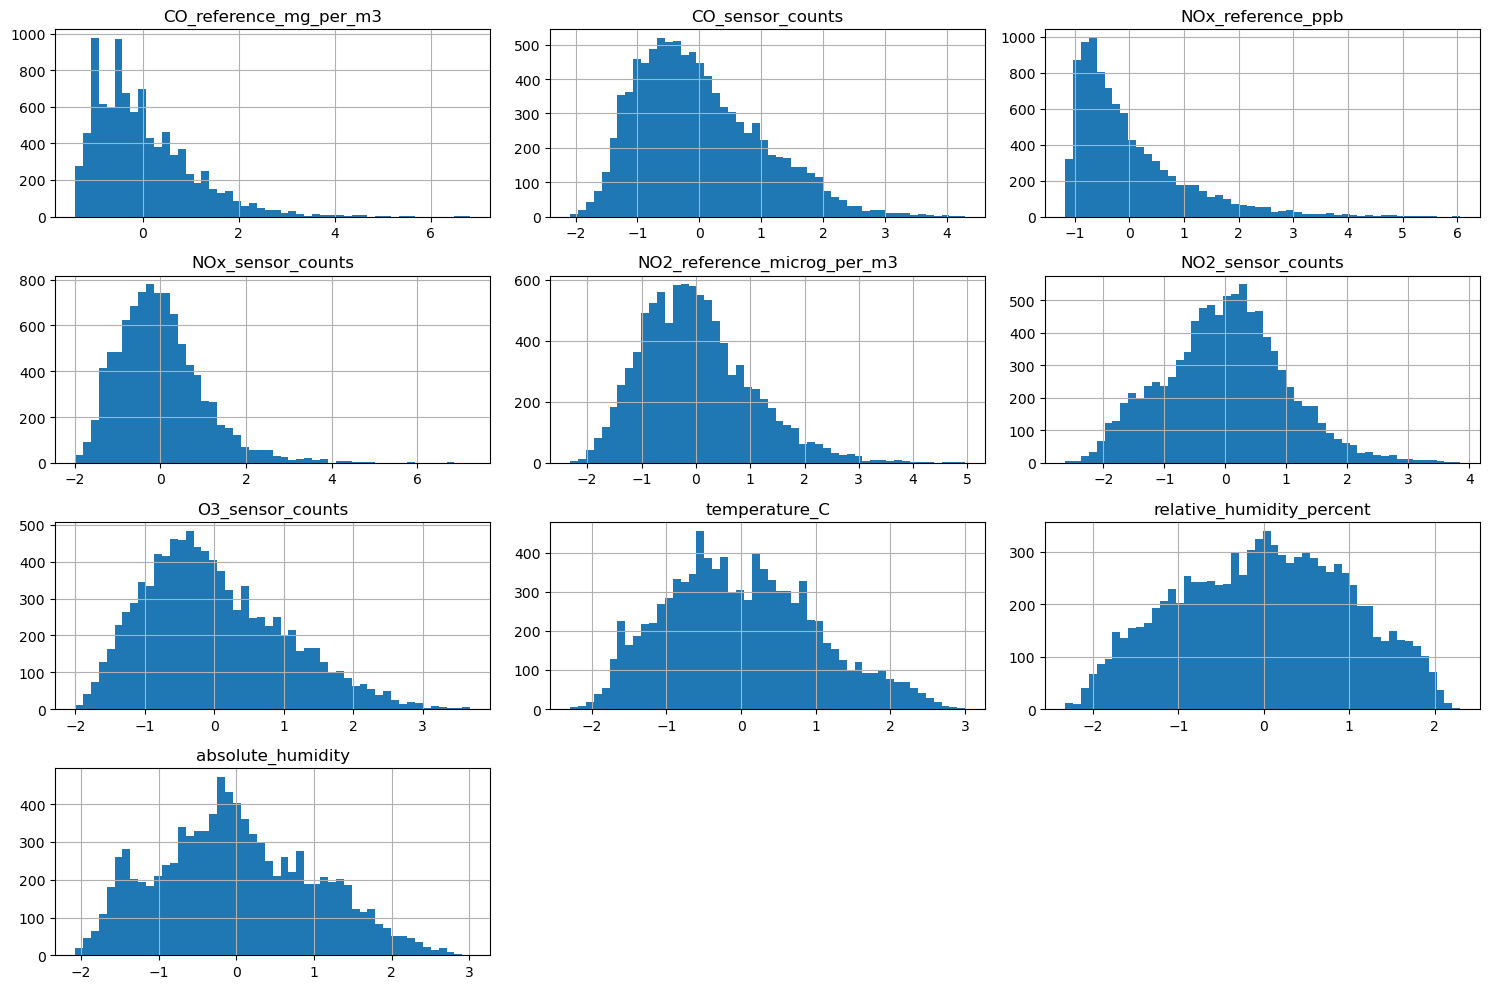

In [24]:
data_cleaned_norm[numerical_cols].hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

In [25]:
data_cleaned_norm.to_csv("../data/processed/AirQuality_cleaned_norm.csv")